<a href="https://colab.research.google.com/github/leovaldesz/Atividades-Aprendizagem-de-m-quina/blob/master/Semana%201/Semana_1_Pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados para classificação do tipo de vidro

Dataset com dados dos elementos químicos que compõe a peça de vidro e sua respectivas classificações

*   https://www.kaggle.com/uciml/glass
*   Atributos:
  *   RI : Index de refração
  *   Na : Sódio
  *   Mg : Magnésio
  *   Al : Alumínio
  *   Si : Silicone
  *   K : Potássio
  *   Ca : Cálcio
  *   Ba : Bário
  *   Fe : Ferro
  *   Type : Tipo (Atributo de Classificação):
      *   1:  janela de edifício flutuante processada
      *   2:  janela de edifício não flutuante processada
      *   3:  janela de veículo flutuante processada
      *   4:  janela de veículo flutuante não processada
      *   5:  Containers
      *   6:  Talheres
      *   7:  Faróis
*   214 instâncias
*   Problema de classificação


















# 1 - Realizando a leitura dos dados com pandas

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd 
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/glass.csv')
data_frame.head() #Verificar se foi lido normal

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data_frame.columns #mostrar as colunas

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [4]:
import pandas as pd
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/glass.csv')
data_frame.head() #Verificar se foi lido normal

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data_frame.columns #mostrar as colunas

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

# 

# 2 - Limpeza e organização dos dados

* No dataset em questão não há dados Nan, None, ? ou faltantes.
* Não há colunas irrelevantes.
* Todos os dados são numéricos.



# 3 - Análise dos dados

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 

 - Histograma

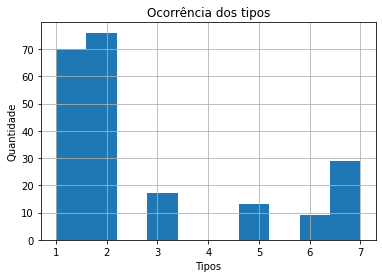

In [7]:
plt.hist(data_frame['Type'])
plt.xlabel('Tipos')
plt.ylabel('Quantidade')
plt.title('Ocorrência dos tipos')
plt.grid(True)
plt.show()


In [8]:
#Contar a quantidade de ocorrência
print('Tipo 1: {}'.format(data_frame[data_frame['Type'] == 1].shape[0]))
print('Tipo 2: {}'.format(data_frame[data_frame['Type'] == 2].shape[0]))
print('Tipo 3: {}'.format(data_frame[data_frame['Type'] == 3].shape[0]))
print('Tipo 4: {}'.format(data_frame[data_frame['Type'] == 4].shape[0]))
print('Tipo 5: {}'.format(data_frame[data_frame['Type'] == 5].shape[0]))
print('Tipo 6: {}'.format(data_frame[data_frame['Type'] == 6].shape[0]))
print('Tipo 7: {}'.format(data_frame[data_frame['Type'] == 7].shape[0]))

Tipo 1: 70
Tipo 2: 76
Tipo 3: 17
Tipo 4: 0
Tipo 5: 13
Tipo 6: 9
Tipo 7: 29


 - Com o histograma e a quantidade de ocorrências para cada tipo, pode-se perceber algumas coisas:
  *   Não há ocorrências do tipo 4. Então para uma possível implementação de um algoritmo de classificação, esse tipo ficaria prejudicado, sendo impossível classificação para esse tipo.
  *   Os tipos 1 e 2 tem a maior quantidade disparado. Assim prejudica os outros tipos na hora do treinamento, mesmo que os outros possuem ocorrências as quantidades são muito discrepantes, o algoritmo não conseguiria identificar com muita segurança os tipos com menos ocorrências.



 - Distribuição de probabilidade

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


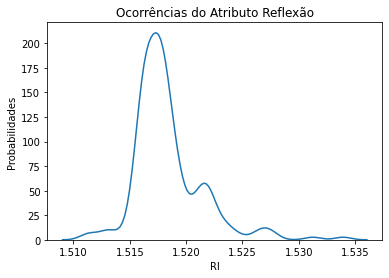

In [9]:
import seaborn as sns

sns.distplot(data_frame.RI, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Reflexão')
plt.show()

Com o gráfico de distribuição de probabilidade nos mostra que a maioria das peças de vidro tem um índice de reflexão entre 1,515 e 1,520.

 - BoxPlot

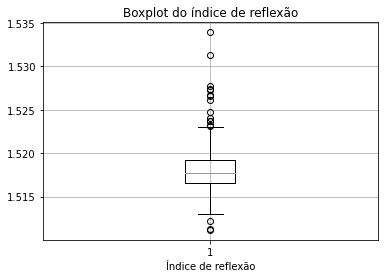

In [10]:
plt.boxplot(data_frame.RI)
plt.title('Boxplot do índice de reflexão')
plt.xlabel('Índice de reflexão')
plt.grid(True)
plt.show()

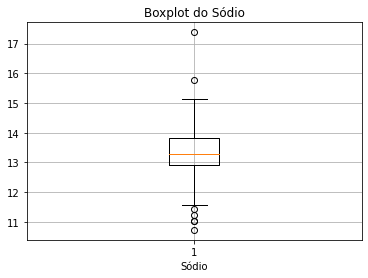

In [11]:
plt.boxplot(data_frame.Na)
plt.title('Boxplot do Sódio')
plt.xlabel('Sódio')
plt.grid(True)
plt.show()

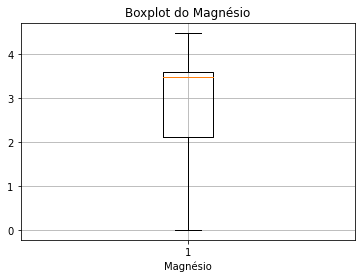

In [12]:
plt.boxplot(data_frame.Mg)
plt.title('Boxplot do Magnésio')
plt.xlabel('Magnésio')
plt.grid(True)
plt.show()

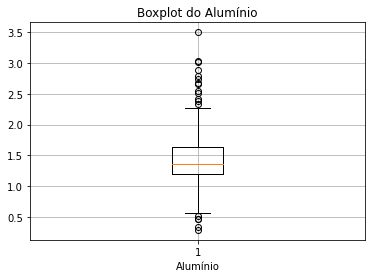

In [13]:
plt.boxplot(data_frame.Al)
plt.title('Boxplot do Alumínio')
plt.xlabel('Alumínio')
plt.grid(True)
plt.show()

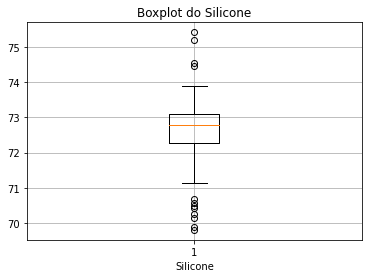

In [14]:
plt.boxplot(data_frame.Si)
plt.title('Boxplot do Silicone')
plt.xlabel('Silicone')
plt.grid(True)
plt.show()

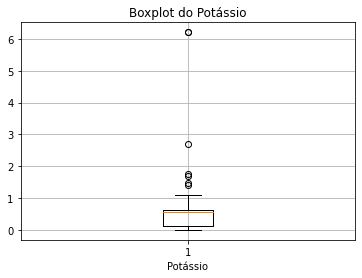

In [15]:
plt.boxplot(data_frame.K)
plt.title('Boxplot do Potássio')
plt.xlabel('Potássio')
plt.grid(True)
plt.show()

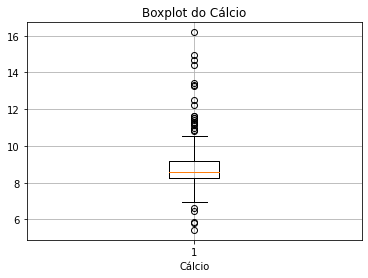

In [16]:
plt.boxplot(data_frame.Ca)
plt.title('Boxplot do Cálcio')
plt.xlabel('Cálcio')
plt.grid(True)
plt.show()

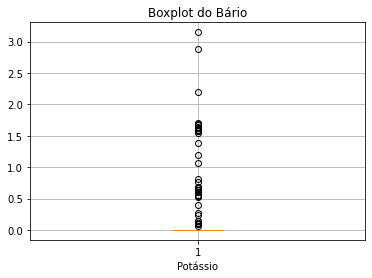

In [17]:
plt.boxplot(data_frame.Ba)
plt.title('Boxplot do Bário')
plt.xlabel('Potássio')
plt.grid(True)
plt.show()

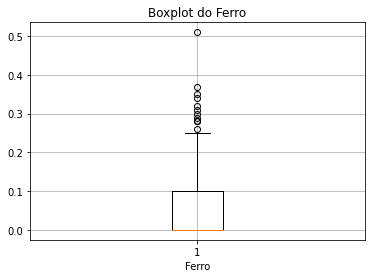

In [18]:
plt.boxplot(data_frame.Fe)
plt.title('Boxplot do Ferro')
plt.xlabel('Ferro')
plt.grid(True)
plt.show()

Ao plotar os Boxplots para cada atributo, percebe-se a quantidade de outliers presententes neles, os 1º e 3º quartis e a mediana. 

 - Análise comparativa dos atributos entre as classes
*   Não será criado um dataframe para o tipo 4, pois como ja foi visto ele não possui nenhuma ocorrência



In [19]:
#Criando dataframe apenas para o Tipo 1
type_1 = data_frame[data_frame['Type'] == 1].drop(columns = ['Type']).reset_index(drop = True)

In [20]:
#Criando dataframe apenas para o Tipo 2
type_2 = data_frame[data_frame['Type'] == 2].drop(columns = ['Type']).reset_index(drop = True)

In [21]:
#Criando dataframe apenas para o Tipo 3
type_3 = data_frame[data_frame['Type'] == 3].drop(columns = ['Type']).reset_index(drop = True)

In [22]:
#Criando dataframe apenas para o Tipo 5
type_5 = data_frame[data_frame['Type'] == 5].drop(columns = ['Type']).reset_index(drop = True)

In [23]:
#Criando dataframe apenas para o Tipo 6
type_6 = data_frame[data_frame['Type'] == 6].drop(columns = ['Type']).reset_index(drop = True)

In [24]:
#Criando dataframe apenas para o Tipo 7
type_7 = data_frame[data_frame['Type'] == 7].drop(columns = ['Type']).reset_index(drop = True)

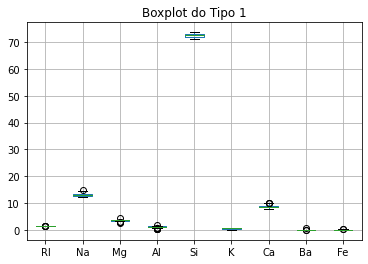

In [25]:
type_1.boxplot()
plt.title('Boxplot do Tipo 1')
plt.show()

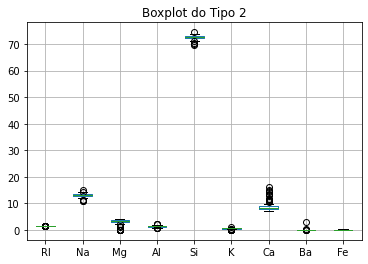

In [26]:
type_2.boxplot()
plt.title('Boxplot do Tipo 2')
plt.show()

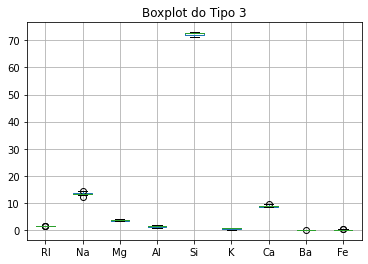

In [27]:
type_3.boxplot()
plt.title('Boxplot do Tipo 3')
plt.show()

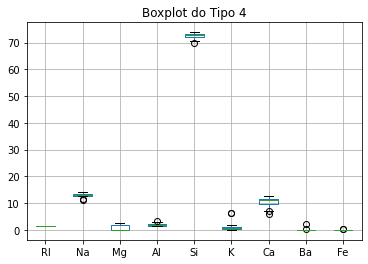

In [28]:
type_5.boxplot()
plt.title('Boxplot do Tipo 4')
plt.show()

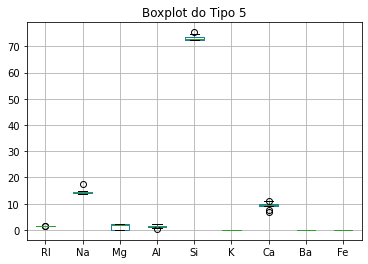

In [29]:
type_6.boxplot()
plt.title('Boxplot do Tipo 5')
plt.show()

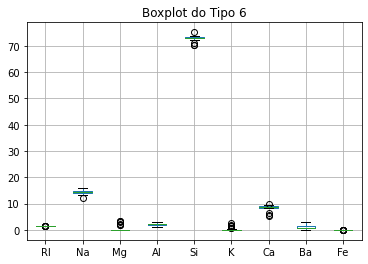

In [30]:
type_7.boxplot()
plt.title('Boxplot do Tipo 6')
plt.show()

De primeira podemos perceber nesse Boxplot que as escalas entre os atributos estão muito diferentes, principalmente do atributo Si (Silicone) em relação aos outros. Vai ser preciso fazer uma reescala nos dados para não acontecer de um atributo que contenha uma escala muito maior que os outos acabe se sobressaindo no algoritmo de classificação.

# 4 - Análise estatística dos dados

- Média

In [31]:
type_1.mean()

RI     1.518718
Na    13.242286
Mg     3.552429
Al     1.163857
Si    72.619143
K      0.447429
Ca     8.797286
Ba     0.012714
Fe     0.057000
dtype: float64

In [32]:
type_2.mean()

RI     1.518619
Na    13.111711
Mg     3.002105
Al     1.408158
Si    72.598026
K      0.521053
Ca     9.073684
Ba     0.050263
Fe     0.079737
dtype: float64

In [33]:
type_3.mean()

RI     1.517964
Na    13.437059
Mg     3.543529
Al     1.201176
Si    72.404706
K      0.406471
Ca     8.782941
Ba     0.008824
Fe     0.057059
dtype: float64

In [34]:
type_5.mean()

RI     1.518928
Na    12.827692
Mg     0.773846
Al     2.033846
Si    72.366154
K      1.470000
Ca    10.123846
Ba     0.187692
Fe     0.060769
dtype: float64

In [35]:
type_6.mean()

RI     1.517456
Na    14.646667
Mg     1.305556
Al     1.366667
Si    73.206667
K      0.000000
Ca     9.356667
Ba     0.000000
Fe     0.000000
dtype: float64

In [36]:
type_7.mean()

RI     1.517116
Na    14.442069
Mg     0.538276
Al     2.122759
Si    72.965862
K      0.325172
Ca     8.491379
Ba     1.040000
Fe     0.013448
dtype: float64

 

---


 - Desvio Padrão

In [37]:
type_1.std()

RI    0.002268
Na    0.499301
Mg    0.247043
Al    0.273158
Si    0.569484
K     0.214879
Ca    0.574807
Ba    0.083838
Fe    0.089075
dtype: float64

In [38]:
type_2.std()

RI    0.003802
Na    0.664159
Mg    1.215661
Al    0.318340
Si    0.724573
K     0.213726
Ca    1.921635
Ba    0.362340
Fe    0.106433
dtype: float64

In [39]:
type_3.std()

RI    0.001916
Na    0.506887
Mg    0.162786
Al    0.347489
Si    0.512276
K     0.229890
Ca    0.380111
Ba    0.036380
Fe    0.107864
dtype: float64

In [40]:
type_5.std()

RI    0.003345
Na    0.777037
Mg    0.999146
Al    0.693920
Si    1.282319
K     2.138695
Ca    2.183791
Ba    0.608251
Fe    0.155588
dtype: float64

In [41]:
type_6.std()

RI    0.003116
Na    1.084020
Mg    1.097134
Al    0.571861
Si    1.079467
K     0.000000
Ca    1.449948
Ba    0.000000
Fe    0.000000
dtype: float64

In [42]:
type_7.std()

RI    0.002545
Na    0.686359
Mg    1.117683
Al    0.442726
Si    0.940234
K     0.668493
Ca    0.973505
Ba    0.665341
Fe    0.029794
dtype: float64

- Gráfico de barras Comparando a Média e Desvio Padrão dos atributos para todos os tipos

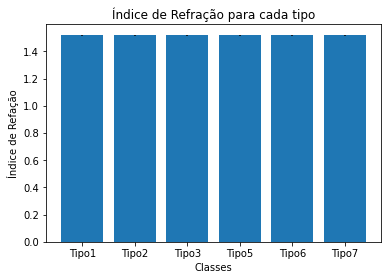

In [43]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.RI.mean(),type_2.RI.mean(),type_3.RI.mean(),type_5.RI.mean(),type_6.RI.mean(),type_7.RI.mean()],yerr=[type_1.RI.std(),type_2.RI.std(),type_3.RI.std(),type_5.RI.std(),type_6.RI.std(),type_7.RI.std()])
plt.xlabel('Classes')
plt.ylabel('Índice de Refação')
plt.title('Índice de Refração para cada tipo')
plt.show()

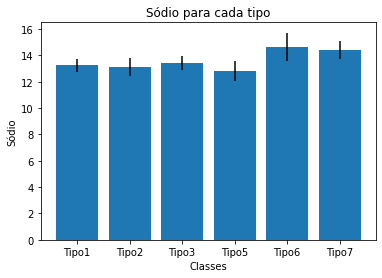

In [44]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.Na.mean(),type_2.Na.mean(),type_3.Na.mean(),type_5.Na.mean(),type_6.Na.mean(),type_7.Na.mean()],yerr=[type_1.Na.std(),type_2.Na.std(),type_3.Na.std(),type_5.Na.std(),type_6.Na.std(),type_7.Na.std()])
plt.xlabel('Classes')
plt.ylabel('Sódio')
plt.title('Sódio para cada tipo')
plt.show()

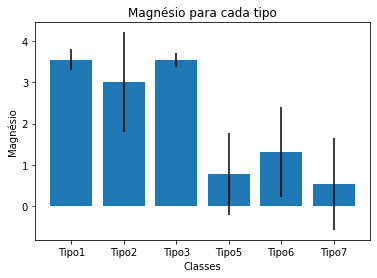

In [45]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.Mg.mean(),type_2.Mg.mean(),type_3.Mg.mean(),type_5.Mg.mean(),type_6.Mg.mean(),type_7.Mg.mean()],yerr=[type_1.Mg.std(),type_2.Mg.std(),type_3.Mg.std(),type_5.Mg.std(),type_6.Mg.std(),type_7.Mg.std()])
plt.xlabel('Classes')
plt.ylabel('Magnésio')
plt.title('Magnésio para cada tipo')
plt.show()

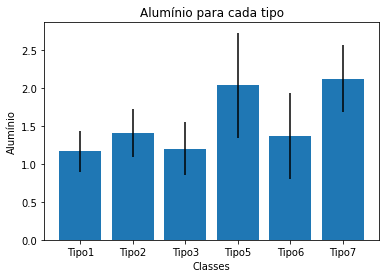

In [46]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.Al.mean(),type_2.Al.mean(),type_3.Al.mean(),type_5.Al.mean(),type_6.Al.mean(),type_7.Al.mean()],yerr=[type_1.Al.std(),type_2.Al.std(),type_3.Al.std(),type_5.Al.std(),type_6.Al.std(),type_7.Al.std()])
plt.xlabel('Classes')
plt.ylabel('Alumínio')
plt.title('Alumínio para cada tipo')
plt.show()

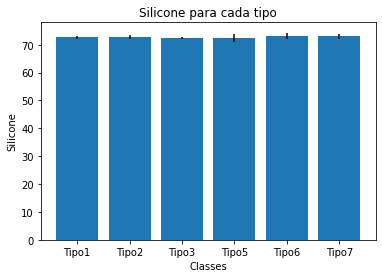

In [47]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.Si.mean(),type_2.Si.mean(),type_3.Si.mean(),type_5.Si.mean(),type_6.Si.mean(),type_7.Si.mean()],yerr=[type_1.Si.std(),type_2.Si.std(),type_3.Si.std(),type_5.Si.std(),type_6.Si.std(),type_7.Si.std()])
plt.xlabel('Classes')
plt.ylabel('Silicone')
plt.title('Silicone para cada tipo')
plt.show()

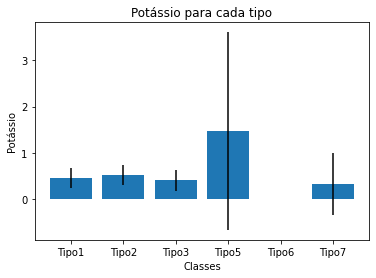

In [48]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.K.mean(),type_2.K.mean(),type_3.K.mean(),type_5.K.mean(),type_6.K.mean(),type_7.K.mean()],yerr=[type_1.K.std(),type_2.K.std(),type_3.K.std(),type_5.K.std(),type_6.K.std(),type_7.K.std()])
plt.xlabel('Classes')
plt.ylabel('Potássio')
plt.title('Potássio para cada tipo')
plt.show()

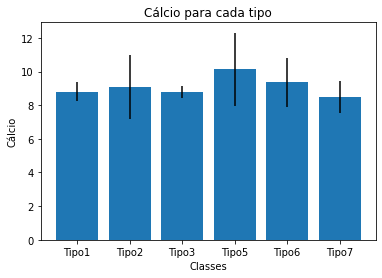

In [49]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.Ca.mean(),type_2.Ca.mean(),type_3.Ca.mean(),type_5.Ca.mean(),type_6.Ca.mean(),type_7.Ca.mean()],yerr=[type_1.Ca.std(),type_2.Ca.std(),type_3.Ca.std(),type_5.Ca.std(),type_6.Ca.std(),type_7.Ca.std()])
plt.xlabel('Classes')
plt.ylabel('Cálcio')
plt.title('Cálcio para cada tipo')
plt.show()

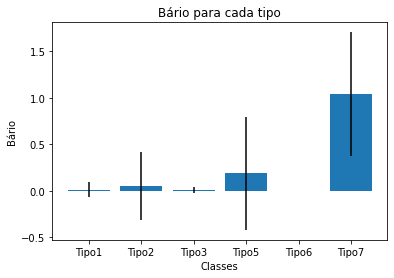

In [50]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.Ba.mean(),type_2.Ba.mean(),type_3.Ba.mean(),type_5.Ba.mean(),type_6.Ba.mean(),type_7.Ba.mean()],yerr=[type_1.Ba.std(),type_2.Ba.std(),type_3.Ba.std(),type_5.Ba.std(),type_6.Ba.std(),type_7.Ba.std()])
plt.xlabel('Classes')
plt.ylabel('Bário')
plt.title('Bário para cada tipo')
plt.show()

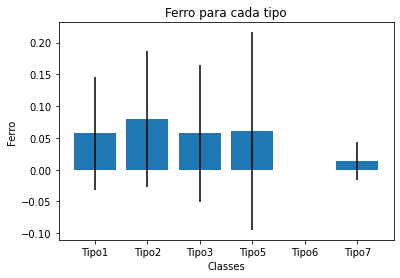

In [51]:
plt.bar(['Tipo1','Tipo2','Tipo3','Tipo5','Tipo6','Tipo7'],[type_1.Fe.mean(),type_2.Fe.mean(),type_3.Fe.mean(),type_5.Fe.mean(),type_6.Fe.mean(),type_7.Fe.mean()],yerr=[type_1.Fe.std(),type_2.Fe.std(),type_3.Fe.std(),type_5.Fe.std(),type_6.Fe.std(),type_7.Fe.std()])
plt.xlabel('Classes')
plt.ylabel('Ferro')
plt.title('Ferro para cada tipo')
plt.show()

# 5 - Estudo da Correlação entre atributos

In [52]:
#calculando a correlação entre todos os atributos e o atributo de classe
for col in data_frame.columns[1:]:
    print(col,': ',round(data_frame.Type.corr(data_frame[col]),2))

Na :  0.5
Mg :  -0.74
Al :  0.6
Si :  0.15
K :  -0.01
Ca :  0.0
Ba :  0.58
Fe :  -0.19
Type :  1.0


Com as correlações numéricas já da para perceber que não existe uma grande correlação do tipo com nenhum outro atributo, sendo o mais próximo o Mg (Magnésio) de ter uma correlação negativa em relação a tipo. E o atributos Si (Silicone),  K (Potássio), Ca (Cálcio) e Fe (Ferro), tem correlação muito próxima de nula.
Portanto um atributo só não é o bastante para definir o tipo.

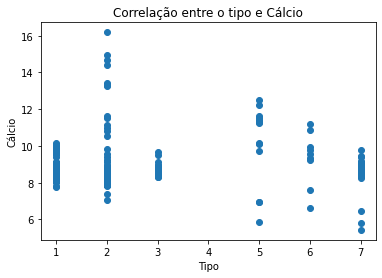

In [53]:
# plotando correlação entre o tipo e Ca
plt.scatter(data_frame.Type,data_frame.Ca)
plt.xlabel('Tipo')
plt.ylabel('Cálcio')
plt.title('Correlação entre o tipo e Cálcio')
plt.show()

A Correlação nesse caso é 0. Sendo assim no gráfico podemos perceber que não há nenhum movimento em comum entre os atributos cálcio e Tipo.

In [54]:
# correlaçao entre os atributos
corr = data_frame.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


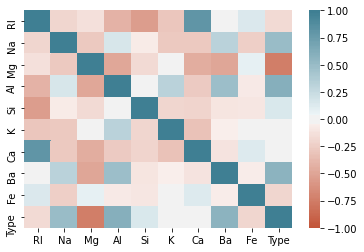

In [55]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

*   Com o gráfico de Calor e a tabela de correlações percebe-se que a maioria dos atributos tem muito pouca correlação. Isto é esperado dado o domínio do problema, pois os elementos são independentes.

*  Porém alguns poucos atributos tem uma correlação um pouco mais alta. Como RI e Ca.




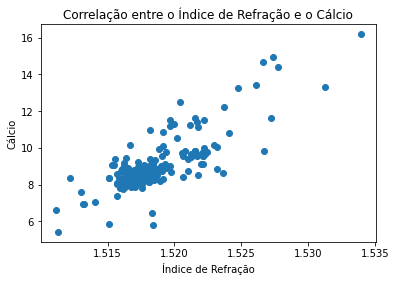

In [56]:
# plotando correlação entre o Ri e Ca
plt.scatter(data_frame.RI,data_frame.Ca)
plt.xlabel('Índice de Refração')
plt.ylabel('Cálcio')
plt.title('Correlação entre o Índice de Refração e o Cálcio')
plt.show()

Podemos ver nesse gráfico um pouco de correlação entre os atributos, isso quer dizer que provavelmente o cálcio tem alguma influência para a refração da peça de vidro. A relação seria de que, quanto maior o cálcio maior o índice de refração.

# 6 - Reescala dos dados

*   Como foi visto em uma das análises anteriores, alguns atributos estão em escalas diferentes dos outros, sendo necessário assim, fazer uma reescala dos mesmos.
*   O atributo que mais difere os outros em relação a escala é o Si (Silicone)


In [57]:
silicone = data_frame.Si
silicone

0      71.78
1      72.73
2      72.99
3      72.61
4      73.08
       ...  
209    72.61
210    73.06
211    73.42
212    73.61
213    73.36
Name: Si, Length: 214, dtype: float64

In [58]:
calcio = data_frame.Ca
calcio

0      8.75
1      7.83
2      7.78
3      8.22
4      8.07
       ... 
209    9.18
210    8.40
211    8.44
212    8.48
213    8.62
Name: Ca, Length: 214, dtype: float64

In [59]:
ferro = data_frame.Fe
ferro

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
209    0.0
210    0.0
211    0.0
212    0.0
213    0.0
Name: Fe, Length: 214, dtype: float64

In [60]:
bario = data_frame.Ba
bario

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
209    1.06
210    1.59
211    1.64
212    1.57
213    1.67
Name: Ba, Length: 214, dtype: float64

In [61]:
potassio = data_frame.K
potassio

0      0.06
1      0.48
2      0.39
3      0.57
4      0.55
       ... 
209    0.08
210    0.00
211    0.00
212    0.00
213    0.00
Name: K, Length: 214, dtype: float64

In [62]:
aluminio = data_frame.Al
aluminio

0      1.10
1      1.36
2      1.54
3      1.29
4      1.24
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 214, dtype: float64

In [63]:
magnesio = data_frame.Mg
magnesio

0      4.49
1      3.60
2      3.55
3      3.69
4      3.62
       ... 
209    0.00
210    0.00
211    0.00
212    0.00
213    0.00
Name: Mg, Length: 214, dtype: float64

In [64]:
sodio = data_frame.Na
sodio

0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Na, Length: 214, dtype: float64

In [65]:
indice_refr = data_frame.RI
indice_refr

0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: RI, Length: 214, dtype: float64

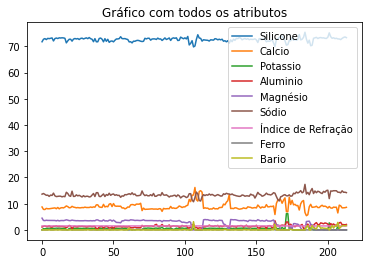

In [66]:
plt.plot(silicone, label= 'Silicone')
plt.plot(calcio, label = 'Calcio')
plt.plot(potassio, label = 'Potassio')
plt.plot(aluminio, label = 'Aluminio')
plt.plot(magnesio, label = 'Magnésio')
plt.plot(sodio, label = 'Sódio')
plt.plot(indice_refr, label = 'Índice de Refração')
plt.plot(ferro, label = 'Ferro')
plt.plot(bario, label = 'Bario')
plt.title('Gráfico com todos os atributos')
plt.legend()
plt.show()

Com o gráfico é mais fácil de observar as diferenças de escala, o Silicone como foi mencionado é o com a maior diferença, mas também a diferenças entre os outros como o Sódio e o Cálcio em relaçao aos outros elementos.

Re-escala pelo máximo

In [67]:
silicone = silicone/silicone.max()
calcio = calcio/calcio.max()
ferro = ferro/ferro.max()
magnesio = magnesio/magnesio.max()
indice_refr = indice_refr/indice_refr.max()
sodio = sodio/sodio.max()
potassio = potassio/potassio.max()
bario = bario/bario.max()

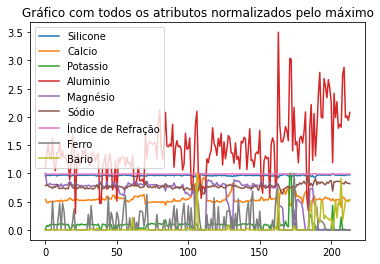

In [68]:
plt.plot(silicone, label= 'Silicone')
plt.plot(calcio, label = 'Calcio')
plt.plot(potassio, label = 'Potassio')
plt.plot(aluminio, label = 'Aluminio')
plt.plot(magnesio, label = 'Magnésio')
plt.plot(sodio, label = 'Sódio')
plt.plot(indice_refr, label = 'Índice de Refração')
plt.plot(ferro, label = 'Ferro')
plt.plot(bario, label = 'Bario')
plt.title('Gráfico com todos os atributos normalizados pelo máximo')
plt.legend()
plt.show()

Re-escala usando maximo e minimo

In [69]:
#Recarregando dados
silicone = data_frame.Si
potassio = data_frame.K
bario = data_frame.Ba
indice_refr = data_frame.RI
ferro = data_frame.Fe
magnesio = data_frame.Mg
calcio = data_frame.Ca
aluminio = data_frame.Al
sodio = data_frame.Na

In [70]:
#fazendo as reescalas
silicone = (silicone-silicone.min())/(silicone.max()-silicone.min())
potassio = (potassio-potassio.min())/(potassio.max()-potassio.min())
bario = (bario-bario.min())/(bario.max()-bario.min())
indice_refr = (indice_refr-indice_refr.min())/(indice_refr.max()-indice_refr.min())
ferro = (ferro-ferro.min())/(ferro.max()-ferro.min())
magnesio = (magnesio-magnesio.min())/(magnesio.max()-magnesio.min())
calcio = (calcio-calcio.min())/(calcio.max()-calcio.min())
aluminio = (aluminio-aluminio.min())/(aluminio.max()-aluminio.min())
sodio = (sodio-sodio.min())/(sodio.max() - sodio.min())


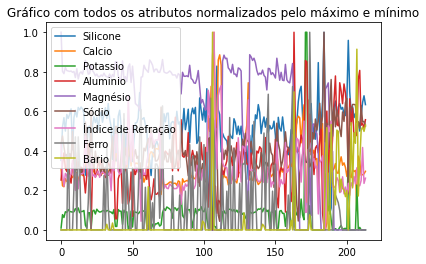

In [71]:
plt.plot(silicone, label= 'Silicone')
plt.plot(calcio, label = 'Calcio')
plt.plot(potassio, label = 'Potassio')
plt.plot(aluminio, label = 'Aluminio')
plt.plot(magnesio, label = 'Magnésio')
plt.plot(sodio, label = 'Sódio')
plt.plot(indice_refr, label = 'Índice de Refração')
plt.plot(ferro, label = 'Ferro')
plt.plot(bario, label = 'Bario')
plt.title('Gráfico com todos os atributos normalizados pelo máximo e mínimo')
plt.legend()
plt.show()

Re-escala utilizando média e desvio padrão

In [72]:
#Recarregando dados
silicone = data_frame.Si
potassio = data_frame.K
bario = data_frame.Ba
indice_refr = data_frame.RI
ferro = data_frame.Fe
magnesio = data_frame.Mg
calcio = data_frame.Ca
aluminio = data_frame.Al
sodio = data_frame.Na

In [73]:
silicone = (silicone-silicone.mean())/silicone.std()
potassio = (potassio-potassio.mean())/potassio.std()
bario = (bario-bario.mean())/bario.std()
indice_refr = (indice_refr-indice_refr.mean())/indice_refr.std()
ferro = (ferro-ferro.mean())/ferro.std()
magnesio = (magnesio-magnesio.mean())/magnesio.std()
calcio = (calcio-calcio.mean())/calcio.std()
aluminio = (aluminio-aluminio.mean())/aluminio.std()
sodio = (sodio - sodio.mean())/sodio.std()

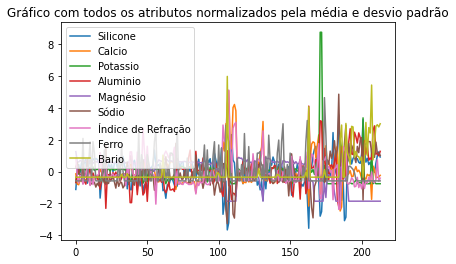

In [74]:
plt.plot(silicone, label= 'Silicone')
plt.plot(calcio, label = 'Calcio')
plt.plot(potassio, label = 'Potassio')
plt.plot(aluminio, label = 'Aluminio')
plt.plot(magnesio, label = 'Magnésio')
plt.plot(sodio, label = 'Sódio')
plt.plot(indice_refr, label = 'Índice de Refração')
plt.plot(ferro, label = 'Ferro')
plt.plot(bario, label = 'Bario')
plt.title('Gráfico com todos os atributos normalizados pela média e desvio padrão')
plt.legend()
plt.show()

Com todas as formas de re-escalas feitas, da pra perceber que pra o dóminio em questão a re-escala pela média e desvio padrão normalizou os dados melhor, trazendo todos para uma escala muito próxima


# 7 - Interpretação final

Com toda a análise feita, algumas conclusões podem ser tiradas do dataset:


*   O dataset possui poucos dados, prejudicando assim a interpretação das caracteríscas pelos algoritmos de aprendizagem de máquina.
*   Os tipos 1 e 2 possuem muito mais ocorrências que os outros. Com isso a classificação para os outros tipos é especialmente problemática, tornando difícil a identificação das características para esses tipos.
*   O tipo 4 não possue ocorrência, tornando assim a classificação impossível para esse tipo.
*   Os atributos não têm grandes correlações.
*   As escalas dos atributos são diferentes. Mas isso é concertável com os algoritmos de re-escala.










